# <center><font color=blue>Data 296</font><center>
# <center><font color=blue>Class 2: Data Summaries in Python</font><center>

## <font color=blue>2.0 Import Packages</font>

The packages imported in the cell below are standard in Python, as are their abbreviations np, pd, plt, etc. I recommend always starting you notebook by importing these packages, despite the minor delay from importation. In Python, though, you may import packages as they are needed, and in fact we will do that in several subsequent examples.  
  
In these notes we don't discuss importing of Python packages since the procedure for various operating systems differs somewhat. 

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## <font color=blue>2.1 Univariate Data</font>

Before proceeding to the more complicated summarization of data composed of several variables (_multivariate_ data, in _Python_ most commonly represented by _pandas_ __Dataframes__, we develop summaries for vectors of numbers and text. Only after the concepts for such data are understood do we proceed to multivariate data.  
  
Because methods for numerical and text data are quite different, we handle these cases separately.

### <font color=blue>2.1.1 Visual Summaries for Numerical Data</font>

In the next Class 3 we will discuss the neurological constraints faced by human users of information systems. One of the main findings is that "chunks" of textual and auditory information takes up about the same space in short-term memory as visualizations. Is this the origin of a well-known saying, "A picture is worth a thousand words"? In the rest of this Class, we present various numeric and visual summaries without regard to their effectiveness as tools for data explorations and presentations. 

#### <font color=blue>2.1.1.1 Histograms and Boxplots</font>

For visualizing sets of numbers or text, there are standard representations. For numerical data, we present histograms and boxplots summaries first.

We begin with a dataset that we'll use later in the course. Begin by reading the Michelson-Morley speed of light data and show the first five rows of the DataFrame.

In [2]:
morley = pd.read_csv('data/michelson.csv')
morley.head()

,Expt,Run,Speed
0,1,1,850
1,1,2,740
2,1,3,900
3,1,4,1070
4,1,5,930


In [3]:
morley.shape

(100, 3)

The Michelson-Morley study (1887) was made to detect the 'ether', but was also used to estimate the speed of light. The measurements were made in 5 experiments ('Expt' variable = 1,2,3,4,5). In each experiment, several runs were made using the same protocol. From these data, we want to estimate the speed of light.

****

The first summary of the data is a __histogram__ of the data from all 5 experiments combined.

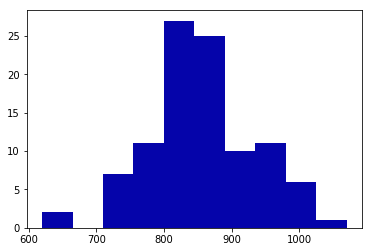

In [4]:
n, bins, patches = plt.hist(x=morley.Speed, color='#0504aa')

A simpler, if less precise, summary of the same data is a __boxplot__. The boxplot shown below is a member of the "matplotlib.pyplot" package.

{'whiskers': [<matplotlib.lines.Line2D at 0x21a7bf1470>,
 'caps': [<matplotlib.lines.Line2D at 0x21a7bf1d30>,
 'boxes': [<matplotlib.lines.Line2D at 0x21a7bf1320>],
 'medians': [<matplotlib.lines.Line2D at 0x21a7bfc5c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x21a7bfc9e8>],
 'means': []}

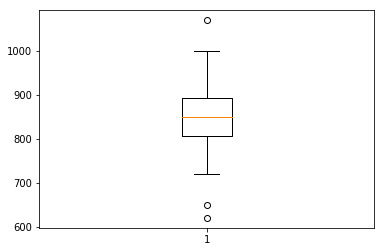

In [5]:
plt.boxplot(morley.Speed)

This figure uses a "five number summary with outliers."  The box with the red line has the following interpretation: (1) the top of the box marks the value at which 75% of the data is below (__Q3__, __upper hinge__), (2) the redline is the __median__ (__Q2__), the value at which 50% of the data lies below, and (3) the bottom of the box marks the value at which 25% of the data lies below (__Q1__, __lower hinge__). An useful measure of data spread is the __interquartile range__, defined as __IQR = Q3 - Q1__. The __upper whisker__ extends to the largest data value less than or equal to __Q3__ + 1.5 $*$ __IQR__, and the __lower whisker__ extends to the smallest data value greater than or equal to __Q1__ - 1.5 $*$ __IQR__. The small circles above the upper whisker and lower whisker are __outliers__, that is, data values that lie above or below the upper and lower whiskers, respectively. 

One imprecision in the description above is how to handle cases in which there is no data point that falls exactly on a hinge or the median. In such cases, one merely interpolates between the two values that "sandwich" the "unobserved" value. For example, __Q2__ = 2.5 and **Q3** = 3.25 for a sample [1, 2, 3, 4]. 

...

One question that arises from MM is this: is it reasonable that all 5 experiments were measuring the same value for the speed of light? Or expressed differently, do the values in each experiment appear to have arisen from an uniform measurement process? For now, we use boxplots an compare each of the 5 experiments. We will revisit this question later when we develop probability and statistics as a means of testing this hypothesis.

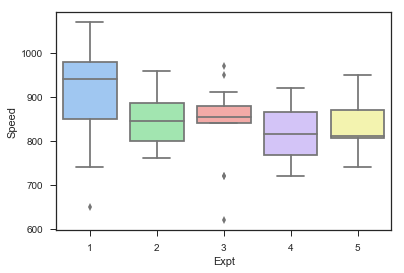

In [6]:
sns.set(style="ticks", palette="pastel")
sns.boxplot(x='Expt', y="Speed", data=morley)

The boxplots in the cell above were produced by the _seaborn_ package. Many data scientists prefer seaborn because of its more flexible interface for plot production. For some further variations on boxplots, see the _seaborn_ documentation [seaborn boxplot docs](https://seaborn.pydata.org/generated/seaborn.boxplot.html).

#### <font color=blue>2.1.1.2 Violin Plots</font>

Seaborn also produces some interesting and informative plots. One is a _violin_ plot, shown for the MM data in the plot below.

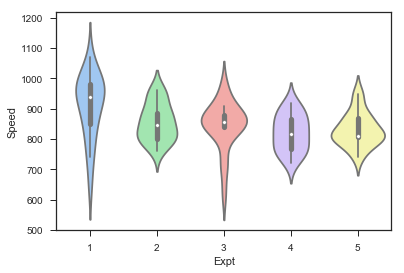

In [7]:
sns.violinplot(x = "Expt", y="Speed", data=morley);

In violin plots, the data has a _smoothed_ histogram of data values, mirrored left-to-right  together with a box plot inside. These box plots don't have outliers as these can be inferred from the top and bottom of a violin which extends for the entire range of the data "violin" which mark the maximum and minimum data values. In a later class, the important topic of smoothing will be presented.

### <font color=blue>2.1.2 Numerical Summaries for Numerical Data</font>

#### <font color=blue>2.1.2.1 Sample Moments</font>

The most common sample __statistics__ (a statistic is a mathematical formula that transforms data into a new form, e.g., $x \rightarrow \{x / |x| \text{ for } x \ne 0, \text{ and } 0 \text{ for } x = 0\}$) measure __location__ (or __central tendency__), __spread__, __skew__ and __peakedness__. We discuss each below, and the standard statistics used to measure them.

#### <font color=blue>2.1.2.2 Measures of Central Tendency</font>

The graphic below shows three measures of __location__, also called __central tendency__. The idea is that each measures in some sense the "middle" of the data. The __sample mode__ is the sample value that is most frequent in the data, i.e.,  the value at which the data is "densest." The __sample mean__ $\bar{x}$, or arithmetic average for a sample $[x_0, x_1, \ldots, x_{n-1}]$ of size $n$ is defined by  
  
<center>$\bar{x} = \frac{1}{n} \sum_{i=1}^{i=n} x_i$.</center>  
  
The __sample median__ $x_{0.50}$ is the value at which 50% or more of the data lie above and 50% or more of the data lie below. It may be calculated by sorting the data from lowest to highest, and using notation $x_{(i)}$ for the sorted sample, setting $x_{0.50} = x_{((n-1)/2)}$ if $n$ is odd, and $x_{0.50} = (x_{((n-2)/2)} + x_{(n/2)})/2$ if $n$ is even. This former value is the sample value at which $(n-1)/2$ values are above and $(n-1)/2$ values below (note that tied sample values don't matter in this calculation), and the latter value is just the average of the two middle sample values.

In the figure below, larger values occur in the upper half of the data (this is called __skew__ - see discussion below). Because of this __right skew__, the sample mean is larger the the sample median.  
  
<font color='green6'>**Question**</font>: Why would the mean be larger than the median?

<img src="images/Wiki-MeasuresOfLocation.png" /> Source: Wikipedia, "Mean".

There are also so-called "robust" measures of location. A popular example is a __5% Winsorized mean__, which is the mean of a sample with the largest $2.5\%$ and smallest $2.5\%$ of the data removed.

#### <font color=blue>2.1.2.3 Measures of Spread</font>

Measures of spread are intended to reflect the "variablility" of the data. The figure below shows two sample histograms, with the red one having lower spread than the blue one. The vertical line indicates the common mean of $\bar{x} = 100$ for each sample. This graph was taken from Wikipedia, and there appears to be an error in it. Can you find it.  
  
  
But the plot does indicate the basic idea behind measuring spread in a sample, namely as a _symmetric function of the deviations from a measure of location_. Question: Based on this statement, suppose each datum in a sample $[x_0, x_1, \ldots, x_{n-1}]$ has the same number $c$ added to it: $y = x + c$.  
  
<font color='green6'>**Question**</font>: What will be the spread of $y$?    
  
For the rest of this class, we reserve the term __deviation__ $d_i$ to be a difference between a sample datum $x_i$ and the sample mean $\bar{x}$:  
  
<center>$d_i = x_i - \bar{x}$.</center>  
  
Question: What is the value of the sum of all deviations in a sample?  

<img src="images/Wiki-Variance.png" /> Source: Wikipedia, "Variance".

We discuss the following measures: __variance__ (standard notation: $\mathbf{s^2}$), __standard deviation__ (standard notation $\mathbf{s}$, $\mathbf{s \ge 0}$), __interquartile range__ (__IQR__) and __mean absolute deviation__ (__MAD__). 

#### <font color=blue>Sample Variance and Standard Deviation ($\mathbf{s^2}$ and $\mathbf{s}$)</font>

The __sample variance__ $\mathbf{s^2} = \mathbf{s_x^2}$ for a sample $[x_0, x_1, \ldots, x_{n-1}]$ is defined by  
  
<center>$s^2 = s_x^2 = \frac{1}{n-1} \sum_{i=0}^{i=n-1} d_i^2 = \frac{1}{n-1} \sum_{i=0}^{i=n-1} (x_i - \bar{x})^2$.</center>  
  
The subscript on $s^2$ is sometimes used to identify the sample data used to form it. The __sample standard deviation__ $\mathbf{s} = \mathbf{s_x}$, $\mathbf{s \ge 0}$ is its square root:

<center>$s = s_x = \sqrt{s^2}$</center>  
  
This definition seems odd for two reasons: (1) the divisor in the variance formula is $n-1$, not $n$, and (2) there seems to be no rationale for squaring. We discuss the reason for this choice in the classes on probability and statistics.  
  
<font color='green6'>**Question**</font>: Need $\mathbf{s}$ always be greater than zero? <img src="images/standard-deviation-examples1.png">

Source: [Statistics How To: Standard Deviation]: http://www.statisticshowto.com/probability-and-statistics/standard-deviation/"  

#### <font color=blue>Sample Inter Quartile Range (IQR)</font>

The IQR was introduced earlier, as the difference between the __third hinge__, $\mathbf{Q3}$ and the __first hinge__, $\mathbf{Q1}$  
  
<center>$\mathbf{IQR = Q3 - Q1}$.</center>  
  
<font color='green6'>**Question**</font>: If the same constant $c$ is added to each sample value, how does this affect the $\mathbf{IQR}$ of the __translated__ sample? 

#### <font color=blue>Sample Mean Absolute Deviation (MAD)</font>

The __mean absolute deviation__ (__MAD__)is defined as  
  
<center>$MAD = \frac{c}{n} \sum_{i=0}^{i=n-1} | \; d_i \; | = \frac{c}{n} \sum_{i=0}^{i=n-1} | \; x_i - \bar{x} \; |$.</center>  
  
where $| \; z \; |$ is the absolute value of $z$ and $c$ is a constant that differs depending on the software implementation and function parameters. In _Python_ __pandas__, the default is $c = 1$.

#### <font color=blue>2.1.2.4 Measures of Skew</font>

Sample Skew occurs when the data are asymmetric. When the data has larger positive (negative) deviations than negative (positive) deviations, the skew will be positive (negative). In the first case, the data are called positively (or "right") skewed, in the second, negatively (or "left") skewed.  In the figure for Section 2.2.1.1, the smooth solid purple histogram is right skewed. For that smoothed histogram,  
  
<center>__mean__ > __median__ > __mode__</center>  
  
For a sample vector $x = [x_0, x_1, \ldots, x_{n-1}]$, a formula for skewness, __skew(x)__, is  
  
<center>$skew(x) = \frac{\frac{1}{n} \sum_{i=0}^{i=n-1} d_i^3}{s^3}$</center>  
  
where as before, $d_i = x_i - \bar{x}$, $i = 0, 1, \ldots, n-1$.

Another measure of skewness is __Galton skewness__, defined as  
  
  <center>$gskew(x) = \frac{Q1 \; - \; 2*Q2 \; + \; Q3}{Q3 \; - \; Q1}$.</center>

#### <font color=blue>2.1.2.5 Measures of Peakedness</font>

The main measure of peakedness for a sample $x = [x_0, x_1, \ldots, x_{n-1}]$ is __kurtosis__, $kurt(x)$, defined as  
  
<center>$kurt(x) = \frac{\frac{1}{n} \sum_{i=0}^{i=n-1} d_i^4}{s^4} - 3$</center>  
  
where as before, $d_i = x_i - \bar{x}$, $i = 0, 1, \ldots, n-1$. It isn't clear why the number '3' should be subtracted from this calculation, but we'll explain that in class 5.

#### <font color=blue>2.1.2.6 Quantiles</font>

Another way to express location in a dataset uses __sample quantiles__. The $p$ __sample quantile__ ($0 \le p \le 1$), or equivalently the $100*p$-th __sample percentile__ is the interpolated or exact value at which a fraction $p$ lies below and $1 - p$ above. The 0.95 sample quantile = 95-th sample percentile will be greater than or equal to 95% of the (possibly interpolated) sample values.

In [8]:
x = np.array([1,2,3,4])
np.percentile(x, 75)

3.25

#### <font color=blue>2.1.2.7 Standardization</font>

It is sometimes useful to __standardize__ a dataset. A dataset $x = [x_0, x_1, \ldots, x_{n-1}]$ with $s_{x} > 0$ is **standardized** if each value $x_i$ is transformed to a value $y_i$ by subtracting the sample mean and dividing by the sample standard deviation:  
  
<center>$y_i = \frac{x_i - \bar{x}}{s_x}$.</center>  
  
The purpose of standardizing is to create an uniquely rescaled sample of $x$ that has two properties:  
  
  1. $\bar{y} = 0$ .... its sample mean is zero, and  
  2. $s_y = 1$ .... its standard deviation is 1.  

#### <font color=blue>2.1.2.6 Simple DataFrame from Class 1</font>

In [9]:
data = {'name': ['Guiseppe', 'Giselle', 'Gay', 'Guido', 'Gertrude'], 
        'age': [21, 55, 33, 45, 83], 
        'preTestScore': [4, 24, 31, 2, 3],
        'postTestScore': [25, 94, 57, 62, 70]}
df1 = pd.DataFrame(data, columns = ['name', 'age', 'preTestScore', 'postTestScore'])
df1

,name,age,preTestScore,postTestScore
0,Guiseppe,21,4,25
1,Giselle,55,24,94
2,Gay,33,31,57
3,Guido,45,2,62
4,Gertrude,83,3,70


#### <font color=blue>Descriptive Statistics: General</font>

In [10]:
df1['preTestScore'].min() # Minimum

2

In [11]:
df1['preTestScore'].max() # Maximum

31

In [12]:
df1['preTestScore'].count() # Count

5

In [13]:
df1['preTestScore'].sum() # Sum

64

In [14]:
df1['preTestScore'].cumsum() # Cumulative Sum

0     4
1    28
2    59
3    61
4    64
Name: preTestScore, dtype: int64

#### <font color=blue>Descriptive Statistics: Location</font>

In [15]:
df1['preTestScore'].mean() # Mean = Average

12.8

In [16]:
df1['preTestScore'].median() # Middle of data: 50% of numbers above, 50% below

4.0

In [17]:
[df1['preTestScore'].mean(),df1['preTestScore'].median()] # All functions can be put into a list

[12.8, 4.0]

#### <font color=blue>Descriptive Statistics: Spread</font>

In [18]:
df1['preTestScore'].var() # Variance

186.7

In [19]:
df1['preTestScore'].std() # Standard Deviation = sqrt( Variance )

13.663820841916802

In [20]:
df1['preTestScore'].mad() # Mean Absolute Deviation

11.76

#### <font color=blue>Descriptive Statistics: Higher Moments</font>

In [21]:
df1['preTestScore'].skew()

0.7433452457326751

In [22]:
df1['preTestScore'].kurt()

-2.4673543738411547

#### <font color=blue>Descriptive Statistics: Variable-at-a-Time Summaries</font>

In [23]:
df1.describe()

,age,preTestScore,postTestScore
count,5.000000,5.000000,5.000000
mean,47.400000,12.800000,61.600000
std,23.638951,13.663821,24.905823
min,21.000000,2.000000,25.000000
25%,33.000000,3.000000,57.000000
50%,45.000000,4.000000,62.000000
75%,55.000000,24.000000,70.000000
max,83.000000,31.000000,94.000000


#### <font color=blue>2.1.2.7 Michelson-Moreley Summary</font>

It is frequently useful to analyzed groups with datasets. In the Michelson-Moreley data, there were 5 experiments done on different days. The summaries for each day are shown in the table below, facilitated by the _pandas_ _DataFrame_ function, __groupby__. The __groupby__ function splits a DataFrame into groups which thereafter analyzed separately by commands such as __sum__, __mean__, __max__, etc. That is, the sum, mean, max, etc. are calculated within each group separately.

In [24]:
morley.groupby('Expt').describe()

Run                                              Speed         \
     count  mean      std  min   25%   50%    75%   max count   mean   
Expt                                                                   
1     20.0  10.5  5.91608  1.0  5.75  10.5  15.25  20.0  20.0  909.0   
2     20.0  10.5  5.91608  1.0  5.75  10.5  15.25  20.0  20.0  856.0   
3     20.0  10.5  5.91608  1.0  5.75  10.5  15.25  20.0  20.0  845.0   
4     20.0  10.5  5.91608  1.0  5.75  10.5  15.25  20.0  20.0  820.5   
5     20.0  10.5  5.91608  1.0  5.75  10.5  15.25  20.0  20.0  831.5   

                                                      
             std    min    25%    50%    75%     max  
Expt                                                  
1     104.926039  650.0  850.0  940.0  980.0  1070.0  
2      61.164145  760.0  800.0  845.0  885.0   960.0  
3      79.106856  620.0  840.0  855.0  880.0   970.0  
4      60.041652  720.0  767.5  815.0  865.0   920.0  
5      54.219340  740.0  807.5  810.0  870.0   950.0

As we will see later, this splitting of the data into groups permits statistical tests on the groups. In the summary above, one of the most important questions is --- Did the experiments measure the same thing? If yes, then it would be reasonable to combine all data and let the overall mean represent an estimate of the speed of light. If not, then it would seem that the experimental method was flawed, and no reliable conclusion could be reached.

### <font color=blue>2.1.3 Visualizations for Text</font>

There are a few visualizations for documents, in which the document's words are considered the sample.

In [25]:
file = open("data/constitution.txt")
constitution = file.read()
constitution_words = constitution.split()
constitution_words[0:10]


['We', 'the', 'People', 'of', 'the', 'United', 'States,', 'in', 'Order', 'to']

In [27]:
# Python program to generate WordCloud
 
# importing all necessery modules
from wordcloud import WordCloud, STOPWORDS
 
comment_words = ' '
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in constitution_words:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
         
    for words in tokens:
        comment_words = comment_words + words + ' '
 
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

ImportError: DLL load failed: The specified module could not be found.

Note that the sizes of words reflect their frequency in the document. This is a flashy way to present word counts, but hardly as precise as a table. There are other visualizations for documents. For further information, see the excellent summary _Text Visualization_ by Jeffrey Heer, [Link to Text Visualization](https://courses.cs.washington.edu/courses/cse512/15sp/lectures/CSE512-Text.pdf).

### <font color=blue>2.1.4 Tabular Representations of Text</font>

The simplest summaries are word counts for a document - the natural _Python_ object for such representation if a _Python_ dictionary of the form  
  
<center>_word_ : _count_</center>  
  
as in  
  
<center>{ 'the' : 294, 'a' : 85, ... }</center>  
  
Word analyses of documents are quite important, but analyses of phrases, and ultimately, semantics and meaning are even more important. Such matters are too advanced for this course and are properly taken up in courses on data on data mining and machine learning.

In the cell below, the frequencies of each word in the U.S. Constitution is calculated in two stages. In the first stage (the first 4 commands) a Python __dict__ (dictionary), __wordfreq__, is created and loaded with key-value pairs, where keys are words, and values are counts. In order to avoid having words with capitalizations counted separately, i.e. "The" and "the", each word is converted to lower case before being counted. In the second phase (the next 4 commands) words are first sorted in order from largest count to least count (__word_desc__), and then assembled into a new dictionary (__word_desc_dict__) that associates keys (words) with counts in descending count order. The last six commands print the first 20 entries in that dictionary.

In [28]:
# The next three commands create a dictionary with words as keys, and values as counts.
wordfreq = {}
for word in constitution_words:
    w = word.lower()
    wordfreq[w] = wordfreq.setdefault(w, 0) + 1

# The next four commands create a dictionary of words sorted in reverse order of word count.
words_desc = sorted(wordfreq, key=wordfreq.__getitem__,reverse=True)
word_desc_dict = {}
for w in words_desc:
    word_desc_dict[w] = wordfreq[w]

count = 0
for key in word_desc_dict.keys():
    print(key + "..." + str(word_desc_dict[key]))
    count = count + 1 
    if count >= 20:
        break


the...421
of...287
and...189
shall...180
be...124
to...109
in...89
or...77
united...54
a...52
by...47
any...42
for...41
states,...38
all...33
which...33
state...33
such...33
may...31
have...30


## <font color=blue>2.2 Bivariate Data</font>

As an introduction to multivariate discussion, we consider the case of data summaries for two numerical measures. As will become apparent, pairwise analysis of variables is the basis for many multivariate methods. 

### <font color=blue>2.2.1 Numerical Summaries </font>

A bivariate dataset consists of $n$ ordered pairs $(x_i, y_i)$, which will often be represented as a _pandas_ _DataFrame_ with $x$'s in one column, and $y$'s in another. In addition to numerical summaries for $x$ and $y$ considered as univariate data, it is also possible to examine the relationships between $x$ and $y$.

####  <font color=blue>2.2.1.1 Sample Covariance and Correlation</font>

 One of the simplest such relationships is called __sample covariance__, a measure of the way $x$ and $y$ co-vary. Analogous to univariate sample variance, the sample covariance $s_{xy}$ is defined as  
  
<center>$s_{xy} = \frac{1}{n-1} \sum_{i=0}^{i=n-1} (x_i - \bar{x})(y_i - \bar{y})$.</center>  
  
Note that like the variance, the divisor is $n-1$, not the number in the sample, $n$. A more useful measure of co-varying is the __correlation__, $cor(x,y)$. It is defined as a "normalized" number in which the univariate standard deviations of $x$ and $y$ have scaled out:  
  
<center>$r_{xy} = \frac{s(x,y}{s(x)s(y)} = \frac{\sum_{i=0}^{i=n-1} (x_i - \bar{x})(y_i - \bar{y})}{\left( \sum_{i=0}^{i=n-1} (x_i - \bar{x})^2) \, (\sum_{i=0}^{i=n-1} (y_i - \bar{y})^2 \right)^{1/2}}$.</center>  

We will not show it, but the sample correlation will always be a number lying in the interval $[-1,1]$.

Recalling the discussion on **standardization** of univariate datasets, one can recognize the correlation $r_{xy}$ as the covariance of standardized data for $x$ and $y$.  
  
The intuiton behind the definition of covariance and correlation is simple: if high values in one sample are paired with high values in the other and low values of one are paired with low values of the other, then the covariance and correlation will be positive. On the other hand, if high values of one are paired with low values of the other and conversely, then the covariance and correlation will be negative.
  
The panel of plots below depict datasets having several correlations between -0.9 and +0.9. 
<img src="images/CorrPanelPlots.png">  

To illustrate calculation of covariance and correlation in Python, we first read a dataset of Dow Jones Industrial Average prices and then convert it to a pandas TimeSeries.

In [29]:
# Read the database of Dow Jones Industrial stock closes from the csv file 'djia_close.csv'.
djia_close_df = pd.read_csv("data/djia_close.csv")
# Ignore these commands for now: they convert dates to a pandas DateTimeIndex
from datetime import datetime
djia_close_df['date'] = pd.to_datetime([datetime.strptime(x, '%Y-%m-%d') for x in djia_close_df['date']])
# Print the column values. The 0th column is 'date', and the DataFrame djia_df is not a TimeSeries type.
print(djia_close_df.columns.values)
# Set the 'date' column to be the index of djia_ts. This converts the DataFrame djia_df into a TimeSeries djia_ts.
djia_close_ts = djia_close_df.set_index('date')
djia_close_ts.head()

['date' 'aapl_close' 'axp_close' 'ba_close' 'cat_close' 'csco_close'
 'cvx_close' 'dwdp_close' 'dis_close' 'ge_close' 'gs_close' 'hd_close'
 'ibm_close' 'intc_close' 'jnj_close' 'jpm_close' 'ko_close' 'mcd_close'
 'mmm_close' 'mrk_close' 'msft_close' 'nke_close' 'pfe_close' 'pg_close'
 'trv_close' 'unh_close' 'utx_close' 'v_close' 'vz_close' 'wmt_close'
 'xom_close']


,aapl_close,axp_close,ba_close,cat_close,csco_close,cvx_close,dwdp_close,dis_close,ge_close,gs_close,...,nke_close,pfe_close,pg_close,trv_close,unh_close,utx_close,v_close,vz_close,wmt_close,xom_close
date,,,,,,,,,,,,,,,,,,,,,
2011-01-03,47.081429,43.400002,66.400002,94.150002,20.490000,91.940002,34.980000,37.820000,18.280001,173.050003,...,21.522499,17.680000,64.769997,55.820000,37.130001,78.989998,17.629999,36.430000,54.560001,74.550003
2011-01-04,47.327145,43.950001,66.940002,93.709999,20.520000,91.599998,34.740002,38.990002,18.610001,173.080002,...,20.992500,17.990000,64.949997,55.570000,37.470001,79.120003,17.650000,37.160000,54.770000,74.900002
2011-01-05,47.714287,45.040001,67.480003,94.519997,20.770000,91.440002,34.680000,39.959999,18.639999,174.000000,...,21.129999,18.110001,64.800003,55.240002,37.590000,79.230003,18.022499,37.669998,54.410000,74.699997
2011-01-06,47.675713,44.730000,68.800003,93.540001,20.950001,90.690002,35.340000,39.650002,18.559999,172.210007,...,20.940001,18.180000,64.690002,54.389999,38.369999,79.150002,18.292500,36.230000,53.959999,75.180000
2011-01-07,48.017143,44.360001,69.379997,93.730003,20.969999,91.190002,34.930000,39.450001,18.430000,170.690002,...,20.882500,18.340000,64.500000,53.330002,38.450001,79.080002,18.240000,35.930000,54.080002,75.589996


Next we choose two columns from **djia_close_ts**, *aapl_close* and *msft_close*.

In [30]:
am_ts = djia_close_ts[['aapl_close','msft_close']]
am_ts.head()

,aapl_close,msft_close
date,,
2011-01-03,47.081429,27.98
2011-01-04,47.327145,28.09
2011-01-05,47.714287,28.00
2011-01-06,47.675713,28.82
2011-01-07,48.017143,28.60


To calculate the covariance and correlation of *aapl_close* and *goog_close*, proceed as shown in the next cell.

In [31]:
print(am_ts.cov())
print("\n")
print(am_ts.corr())

             aapl_close  msft_close
aapl_close  1460.020483  736.558266
msft_close   736.558266  422.357100


            aapl_close  msft_close
aapl_close    1.000000    0.937967
msft_close    0.937967    1.000000


In the $(0,0)$ position of the top covariance matrix, the covariance of *aapl_close* with itself can be checked to be the variance of *aapl_close*. Note that the matrix is symmetric (that is, all $(i,j)$ entries for $i \ne j$ equal $(j,i)$ entries) so that the covariance of *aapl_close* with *msft_close* equals the covariance of *msft_close* with *aapl_close*. This is so because the covariance formula is symmetric , i.e., $cov(x,y) = cov(y,x)$. If you check the calculation of correlation you can verify that  
  
<center>$0.937967 = \frac{736.558266}{\sqrt{1460.020483}\sqrt{422.357100}}$.</center>

####  <font color=blue>2.2.1.2 Spearman Rank Correlation</font>

**Spearman rank correlation** is a simple, robust way to measure co-varying between two variables in a _DataFrame_. As before, consider a sample of $n$ pairs $(x_i, y_i)$. Map each value $x_i$ into its **rank** $r_i$ in its sample. The lowest rank is $1$ and the highest $n$. For example, a sample  
  
<center>$x = [1, 10, 6, 20, 3, 4]$</center>  
  
would be mapped to the rank-vector  
  
<center>$r_x = [1, 5, 4, 6, 2, 3]$.</center>  
  
The **Spearman rank correlation** between $x$ and $y$ is then just the ordinary correlation of the rank vectors $r_x$ and $r_y$.

<font color='green6'>**Question**</font>: Suppose that values $(x_i,y_i)$ in a sample are mapped to $(x_i^3,y_i^3)$. Will the correlation coefficient of $x$ and $y$ be the same as $x^3$ and $y^3$? What about the Spearman rank correlation coefficient?  

In [32]:
import scipy.stats as stats
stats.spearmanr(am_ts["aapl_close"],am_ts["msft_close"])

SpearmanrResult(correlation=0.9163869915656541, pvalue=0.0)

#### <font color=blue>2.2.1.3 Kendall's tau (Coefficient of Concordance)</font>

Suppose $n$ pairs $(x_i,y_i)$ are given. For each $i < j$, let $u_{ij}$ be   
  
<center>$u_{ij} = (x_i - x_j) * (y_i - y_j)$</center>  
  
and assign 

<center>$w_{ij} = +1 \text{ if } u_{ij} > 0, -1 \text{ if } u_{ij} < 0, \text{ and } 0 \text{ if } u_{ij} = 0.$

A pair $(i,j)$ is called *concordant* $u_{ij} > 0$ and *discordant* if $u_{ij} < 0$. The **Kendall's tau** formula is equal to the sum of concordant pairs minus the sum of discordant pairs divided by an expression that normalizes the formula between $-1$ and $+1$, inclusive.

In [33]:
# Calculate Kendall's tau
stats.kendalltau(am_ts["aapl_close"],am_ts["msft_close"])

KendalltauResult(correlation=0.7524843807234867, pvalue=0.0)

### <font color=blue>2.2.2 Visual Summaries </font>

We begin by importing a TimeSeries of stock prices for *aapl* and *goog*, *Apple* and *Google*.

In [34]:
# Read the database of Dow Jones Industrial stock closes from the csv file 'djia_close.csv'.
aapl_goog_df = pd.read_csv("data/aapl-goog.csv")
# Ignore these commands for now: they convert dates to a pandas DateTimeIndex
from datetime import datetime
aapl_goog_df['date'] = pd.to_datetime([datetime.strptime(x, '%Y-%m-%d') for x in aapl_goog_df['date']])
# Print the column values. The 0th column is 'date', and the DataFrame djia_df is not a TimeSeries type.
print(aapl_goog_df.columns.values)
# Set the 'date' column to be the index of djia_ts. This converts the DataFrame djia_df into a TimeSeries djia_ts.
aapl_goog_ts = aapl_goog_df.set_index('date')
# Print the first 5 rows (using .head()) and the first 5 columns of 'djia_ts'.
print("\n",aapl_goog_ts.iloc[0:5,:])

['date' 'aapl_open' 'aapl_high' 'aapl_low' 'aapl_close' 'aapl_volume'
 'goog_open' 'goog_high' 'goog_low' 'goog_close' 'goog_volume']

             aapl_open  aapl_high   aapl_low  aapl_close  aapl_volume  \
date                                                                   
2011-01-03  46.520000  47.180000  46.405716   47.081429    111284600   
2011-01-04  47.491428  47.500000  46.878571   47.327145     77270200   
2011-01-05  47.078571  47.762856  47.071430   47.714287     63879900   
2011-01-06  47.817142  47.892857  47.557144   47.675713     75107200   
2011-01-07  47.712856  48.049999  47.414288   48.017143     77982800   

             goog_open   goog_high    goog_low  goog_close  goog_volume  
date                                                                     
2011-01-03  297.942583  302.493014  297.942583  301.873641      4748100  
2011-01-04  302.508009  302.787736  299.760767  300.759750      3662600  
2011-01-05  299.735765  304.860676  299.725789  304.231297     

#### <font color=blue>2.2.2.1 Scatterplots</font>

Remove all but the *aapl_close* and *goog_close* columns, and make a **scatterplot**.

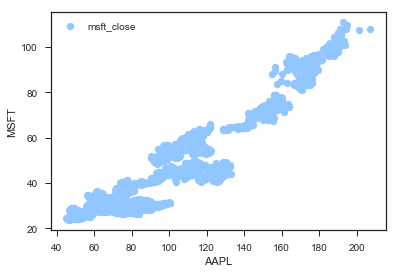

In [35]:
plt.scatter(am_ts["aapl_close"],am_ts["msft_close"])#, s, c="g", alpha=0.5, marker=r'$\clubsuit$', label="Luck")
plt.xlabel("AAPL")
plt.ylabel("MSFT")
plt.legend(loc=2)
plt.show()

Observe how "clumpy" the data appear in the figure above.

<font color='green6'>**Question**</font>: How can you interpret that clumpiness?

## <font color=blue>2.3 Multivariate Data</font>

In this section, we consider the simultaneous analysis of several variables in a *DataFrame*. Some method are simple extensions

### <font color=blue>2.3.1 Covariance and Correlation</font>

In this section we use the TimeSeries **djia_close_ts** having the closing prices of the 30 stocks in the Dow Jones Industrial Index (DJIA). That data was read in Section 2.2.1.1.

#### <font color=blue>2.3.1.1 Numerical Measures of Covariance and Correlation</font>

In the next cell, we request the covariance of that TimeSeries, and are returned a 30x30 numpy matrix. Each entry of the matrix has the covariance between one column of **djia_close_ts** and another. For example, the (1,3) entry of $178.657637$ is the covariance between *axp_close* and *cat_close*.  
  
Note that we slice and display only the first 7 rows and columns of the covariance matrix *dj_cov*.

In [36]:
dj_cov = djia_close_ts.cov()
dj_cov.iloc[0:7,0:7]

,aapl_close,axp_close,ba_close,cat_close,csco_close,cvx_close,dwdp_close
aapl_close,1460.020483,449.263589,2614.148515,458.487143,253.855890,72.037727,444.350901
axp_close,449.263589,267.231876,947.822185,178.657637,87.146280,106.331068,162.032728
ba_close,2614.148515,947.822185,5701.291336,1196.090917,512.972545,292.538332,871.691452
cat_close,458.487143,178.657637,1196.090917,468.359738,89.928594,138.954256,160.184116
csco_close,253.855890,87.146280,512.972545,89.928594,52.818803,21.057941,86.151395
cvx_close,72.037727,106.331068,292.538332,138.954256,21.057941,137.005170,36.204104
dwdp_close,444.350901,162.032728,871.691452,160.184116,86.151395,36.204104,172.168637


In order to make later visualizations more manageable, we work with the first 7 columns of *djia_close_ts*, **djia7_ts** and produce a correlation matrix for that data. 

In [37]:
djia7_ts = djia_close_ts.iloc[:,0:7]
djia7_ts.corr()

,aapl_close,axp_close,ba_close,cat_close,csco_close,cvx_close,dwdp_close
aapl_close,1.000000,0.719246,0.906075,0.554444,0.914142,0.161069,0.886277
axp_close,0.719246,1.000000,0.767885,0.504996,0.733517,0.555709,0.755408
ba_close,0.906075,0.767885,1.000000,0.731961,0.934788,0.331000,0.879831
cat_close,0.554444,0.504996,0.731961,1.000000,0.571760,0.548547,0.564096
csco_close,0.914142,0.733517,0.934788,0.571760,1.000000,0.247544,0.903423
cvx_close,0.161069,0.555709,0.331000,0.548547,0.247544,1.000000,0.235729
dwdp_close,0.886277,0.755408,0.879831,0.564096,0.903423,0.235729,1.000000


#### <font color=blue>2.3.1.2 A Visual Measure of Correlation - The Heatmap</font>

In the following cell, we show a **heatmap** of the 30x30 djia correlation matrix.

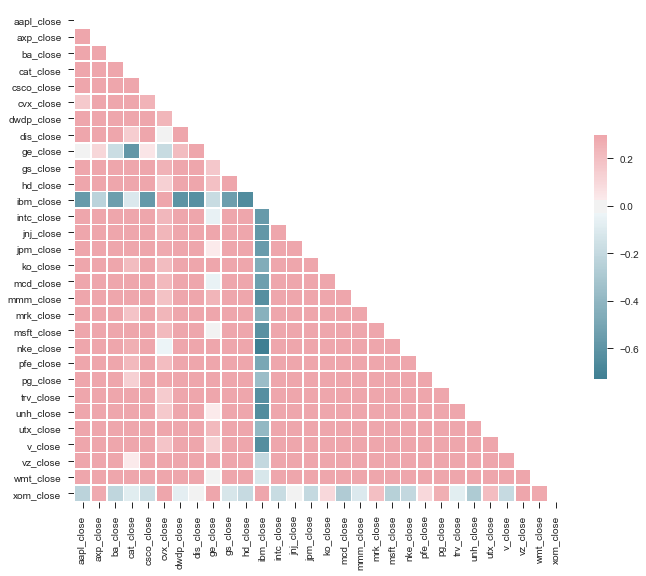

In [38]:
# Generate a 30x30 correlation matrix 
djia_corr = djia_close_ts.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(djia_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(djia_corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

Source: [https://seaborn.pydata.org/examples/many_pairwise_correlations.html](https://seaborn.pydata.org/examples/many_pairwise_correlations.html)

<font color='green6'>**Question**</font>: What do you think of this heatmap? Is is effective?

#### <font color=blue>2.3.1.3 Multiple Correlation</font>

This topic will be discussed in the section(s) on statistics.

### <font color=blue>2.3.2 Network Data</font>

Networks are prevasive in the interconnected works of out era. As an obvious example, people establish connections on Facebook and Twitter. But there are less obvious examples. For example, authors of scholarly publications cite other authors and one may say that (author, cited author) is a "directed link" from the first to the second link. Power grids are interlinked and at a basic level, are composed of generating, transmission, distribution and customer "nodes". Each of these nodes is connected in a vast directed network in whidh power flows from one node to others. This is shown in the following diagram:  

<img src="images/power_grid.jpg" /> Source: [Electrical Power Grid: Power and Working](https://3.bp.blogspot.com/-WM-es1A-K6A/VoaEcBD-J8I/AAAAAAAABtQ/iW3CDr11gp4/s1600/power%2Bgrid.jpg)

A map of the major electrical transmission network in 2012 India, with connections from generating stations to distribution nodes, 400kV and above.
<img src="images/GridMap2012_400kVAndAbove_India.png" />

Source: "https://www.geni.org/globalenergy/library/national_energy_grid/india/graphics/GridMap2012_400kV_above.pdf"

In [39]:
# Author: Aric Hagberg (hagberg@lanl.gov)

#    Copyright (C) 2007-2018 by
#    Aric Hagberg <hagberg@lanl.gov>
#    Dan Schult <dschult@colgate.edu>
#    Pieter Swart <swart@lanl.gov>
#    All rights reserved.
#    BSD license.

try:  # Python 3.x
    import urllib.request as urllib
except ImportError:  # Python 2.x
    import urllib
import io
import zipfile

import matplotlib.pyplot as plt
import networkx as nx
%matplotlib inline

In [40]:
url = "http://www-personal.umich.edu/~mejn/netdata/football.zip"

sock = urllib.urlopen(url)  # open URL
s = io.BytesIO(sock.read())  # read into BytesIO "file"
sock.close()

zf = zipfile.ZipFile(s)  # zipfile object
txt = zf.read('football.txt').decode()  # read info file
gml = zf.read('football.gml').decode()  # read gml data
# throw away bogus first line with # from mejn files
gml = gml.split('\n')[1:]
G = nx.parse_gml(gml)  # parse gml data

In [41]:
print(txt)

The file football.gml contains the network of American football games
between Division IA colleges during regular season Fall 2000, as compiled
by M. Girvan and M. Newman.  The nodes have values that indicate to which
conferences they belong.  The values are as follows:

  0 = Atlantic Coast
  1 = Big East
  2 = Big Ten
  3 = Big Twelve
  4 = Conference USA
  5 = Independents
  6 = Mid-American
  7 = Mountain West
  8 = Pacific Ten
  9 = Southeastern
 10 = Sun Belt
 11 = Western Athletic

If you make use of these data, please cite M. Girvan and M. E. J. Newman,
Community structure in social and biological networks,
Proc. Natl. Acad. Sci. USA 99, 7821-7826 (2002).

Correction: Two edges were erroneously duplicated in this data set, and
have been removed (21 SEP 2014)



In [42]:
# print degree for each team - number of games
count = 0
for n, d in G.degree():
    print('%s %d' % (n, d))
    count = count + 1
    if count >= 20:
        break

BrighamYoung 12
FloridaState 12
Iowa 12
KansasState 12
NewMexico 11
TexasTech 12
PennState 12
SouthernCalifornia 12
ArizonaState 11
SanDiegoState 11
Baylor 10
NorthTexas 10
NorthernIllinois 10
Northwestern 11
WesternMichigan 10
Wisconsin 12
Wyoming 11
Auburn 11
Akron 11
VirginiaTech 11


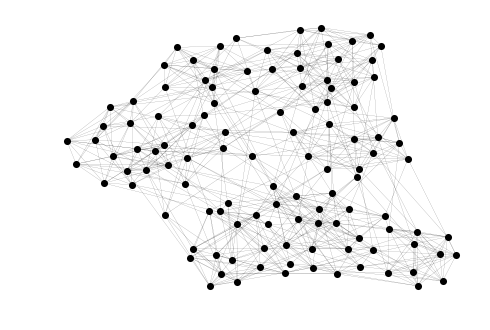

In [43]:
options = {
    'node_color': 'black',
    'node_size': 50,
    'line_color': 'grey',
    'linewidths': 0,
    'width': 0.1,
}
nx.draw(G, **options)
plt.show()

## <font color=blue>2.4 Special Data</font>

### <font color=blue>2.4.1 Time Series Data</font>

__Time series__ are datasets in which the ordering of values is important. Usually, each value in a time series has an associated timestamp. As we observed earlier, a _pandas_ __TimeSeries__ is a specialized __DataFrame__ which has an index of times in ascending order. Consider the example below:

In [44]:
#!/usr/bin/env python
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter, WeekdayLocator,\
    DayLocator, MONDAY
from matplotlib.finance import quotes_historical_yahoo_ohlc, candlestick_ohlc
import datetime

mondays = WeekdayLocator(MONDAY)        # major ticks on the mondays
alldays = DayLocator()              # minor ticks on the days
weekFormatter = DateFormatter('%b %d')  # e.g., Jan 12
dayFormatter = DateFormatter('%d')      # e.g., 12

# Select all dates in year 2016
b2016 = (aapl_goog_ts.index.year == 2016)
df = aapl_goog_df[b2016]

# Create a list for the candlestick function
quotes = []

# Load the quotes list in the correct format
nrows = df.shape[0]
for i in range(nrows):
  rowi = df.iloc[i]
  append_me = float(rowi['date'].toordinal()),rowi['aapl_open'], rowi['aapl_high'], rowi['aapl_low'], rowi['aapl_close']
  quotes.append(append_me)
    
#print(quotes)

fig, ax = plt.subplots()
fig.subplots_adjust(bottom=0.2)
ax.xaxis.set_major_locator(mondays)
#ax.xaxis.set_minor_locator(alldays)
ax.xaxis.set_major_formatter(weekFormatter)
#ax.xaxis.set_minor_formatter(dayFormatter)

#plot_day_summary(ax, quotes, ticksize=3)
candlestick_ohlc(ax, quotes, width=0.6)

ax.xaxis_date()
ax.autoscale_view()
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')

plt.show()

ModuleNotFoundError: No module named 'matplotlib.finance'

### <font color=blue>2.4.2 Audio Data</font>

Audio data can be analyzed in Python, but it is rather complicated because there are so many different audio formats. The link [Audio in Python](https://wiki.python.org/moin/Audio/) provides a starting point. The most important data science audio analysis is "voice and language recognition" software. This area is currently under rapid development although the improvements over the last decade are incredible. They include apps that allow one to write documents or command your computer (i.e., not using a keyboard) [Dragon Naturally Speaking](https://en.wikipedia.org/wiki/Dragon_NaturallySpeaking).  
  
For an introduction to Speech Recognition, see [The Ultimate Guide To Speech Recognition With Python](https://realpython.com/python-speech-recognition/). For an advanced machine learning example, see [Getting Started with Audio Data Analysis using Deep Learning](https://www.analyticsvidhya.com/blog/2017/08/audio-voice-processing-deep-learning/).  
  
We will not discuss audio data any further in this course.

### <font color=blue>2.4.3 Microarray Data</font>

In genetic research and medicine, high tech machines can scan cellular samples and produce huge datasets of cellular genetics.  This area is really specialized. To appreciate it, you need to understand cell and genetic biology, and to a lesser degree to instrumentation. See [Using Python (and R) to draw a Heatmap from Microarray Data](https://warwick.ac.uk/fac/sci/moac/people/students/peter_cock/python/heatmap/) for an introduction to heatmap representations of such data. A sample heatmap is shown below: <img src="images/MicroarrayDataFromPython.png">

Source: https://warwick.ac.uk/fac/sci/moac/people/students/peter_cock/python/heatmap/

### <font color=blue>2.4.4 Image Data</font>

Image analysis is a huge and active area of data science, machine learning (ML) and artificial intelligence (AI). Some obvious AI applications: Autonomous Vehicles, Robotics and Medical Diagnosis of XRays. This area is too specialized for this course. A general Python package for the analysis of such data is [Scikit-Image](https://www.scipy-lectures.org/packages/scikit-image/index.html).

### <font color=blue>2.4.5 Geodata</font>

A package under development, [GeoPandas](http://geopandas.org/), makes operating with spatial, geographical data easier that it is if one starts from scratch. Here are a few examples - [Geographical Display Examples](http://geopandas.org/gallery/index.html). In the preparation instructions for this class, you were to asked to install the _Pandas_ package __geopandas__. In my Ubuntu linux, I needed to issue the commands:  

  <center>conda install -c conda-forge cartopy</center>
<center>pip install geopandas geoplot descartes</center>  
  
The example below plots example data on a Mercador projection of the world.

In [45]:
import shapely
import geoplot
import geopandas

path = geopandas.datasets.get_path('naturalearth_lowres')
df = geopandas.read_file(path)
# Add a column we'll use later
df['gdp_pp'] = df['gdp_md_est'] / df['pop_est']

boroughs = geopandas.read_file(geopandas.datasets.get_path('nybb')).to_crs(epsg='4326')
injurious_collisions = geopandas.read_file(
    "https://github.com/ResidentMario/geoplot-data/raw/master/nyc-injurious-collisions.geojson")

In [46]:
df.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,gdp_pp
0,28400000.0,Asia,Afghanistan,AFG,22270.0,"POLYGON ((61.21081709172574 35.65007233330923,...",0.000784
1,12799293.0,Africa,Angola,AGO,110300.0,(POLYGON ((16.32652835456705 -5.87747039146621...,0.008618
2,3639453.0,Europe,Albania,ALB,21810.0,"POLYGON ((20.59024743010491 41.85540416113361,...",0.005993
3,4798491.0,Asia,United Arab Emirates,ARE,184300.0,"POLYGON ((51.57951867046327 24.24549713795111,...",0.038408
4,40913584.0,South America,Argentina,ARG,573900.0,(POLYGON ((-65.50000000000003 -55.199999999999...,0.014027


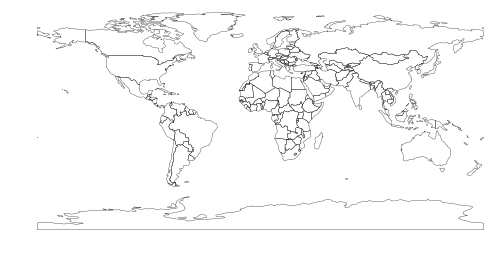

In [47]:
geoplot.polyplot(df, figsize=(8, 4)) # This command plots a mercador projection with country borders but without colors

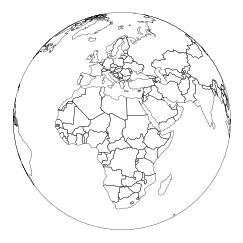

In [48]:
# One can project maps onto a sphere
import geoplot.crs as gcrs
ax = geoplot.polyplot(df, projection=gcrs.Orthographic(), figsize=(8, 4))
ax.set_global()
ax.outline_patch.set_visible(True)

D:\Anaconda\lib\site-packages\pysal\__init__.py:65: VisibleDeprecationWarning: PySAL's API will be changed on 2018-12-31. The last release made with this API is version 1.14.4. A preview of the next API version is provided in the `pysal` 2.0 prelease candidate. The API changes and a guide on how to change imports is provided at https://pysal.org/about
  ), VisibleDeprecationWarning)


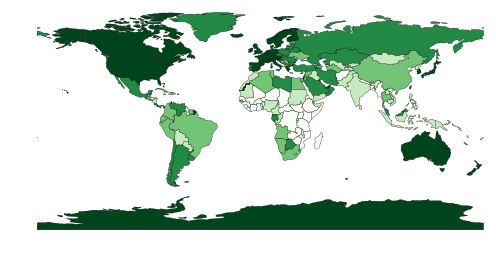

In [49]:
# Plot country populations using shades of green
geoplot.choropleth(df, hue='gdp_pp', cmap='Greens', figsize=(8, 4))

In [1]:
%magic